### População dos estados

Vamos realizar a importação de uma nova base de dados com a informação da população de cada estado do Brasil, para posteriormente encontrarmos a emissão per capita de cada estado.

In [8]:
import pandas as pd

In [14]:
link = r"C:/Users/danie/Documents/POP2022_Municipios.xls"

In [19]:
populacao_estados = pd.read_excel(link,header=1,skipfooter = 34)

In [21]:
populacao_estados.head()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237


Como as informações são referentes aos municípios, vamos realizar uma agregação com base na coluna estado.

In [22]:
populacao_estados.groupby('UF').sum(numeric_only=True)

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757
CE,4232,1295156
DF,53,108
ES,2496,226710
GO,12792,2788737


Percebemos que a informação da população não foi agregada, portanto será necessário algum tratamento nessa coluna para retornar devidamente os dados.

In [23]:
# convertendo o tipo para numerico
populacao_estados['POPULAÇÃO'].astype(int)

ValueError: invalid literal for int() with base 10: '461.748(1)'

In [31]:
# usando metodo para saber se tem caracteres

populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(',na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


In [37]:
populacao_estados = populacao_estados.assign(populacao_sem_parenteses = populacao_estados['POPULAÇÃO'].replace('\(\d{1,2}\)','',regex = True),populacao = lambda x:x.loc[:,'populacao_sem_parenteses'].replace('\.','',regex = True))

In [38]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(',na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_sem_parenteses,populacao
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399
83,AM,13,607,Benjamin Constant,37.436(4),37.436,37436
87,AM,13,805,Borba,33.209(5),33.209,33209
88,AM,13,839,Caapiranga,13.851(6),13.851,13851
97,AM,13,1605,Fonte Boa,27.692(7),27.692,27692
98,AM,13,1654,Guajará,13.809(8),13.809,13809
99,AM,13,1704,Humaitá,59.504(9),59.504,59504
103,AM,13,1951,Itamarati,10.783(10),10.783,10783


In [40]:
# convertendo o tipo
populacao_estados = populacao_estados.astype({'populacao':'int64'})

In [41]:
populacao_estados = populacao_estados.groupby('UF')[['populacao']].sum().reset_index()

### Unindo os dados

Com as informações tratadas, podemos realizar a junção dos dados de emissão com a população, com uso do método [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

Expressões regulares, também chamadas de ['regex'](https://www.alura.com.br/artigos/principais-casos-uso-regex-para-tratamento-dados?_gl=1*1l0izkn*_ga*MTY0MTE4MDM4Ny4xNjkwOTQ1MDQy*_ga_1EPWSW3PCS*MTcwMzM3MDAzMi4xNTIuMS4xNzAzMzcxNjU4LjAuMC4w*_fplc*NFNtd1FOMDJJdWpncVBKODU3YzBPTEklMkZOdGQ4cTFMOTJQTjY1bGklMkZ6RE1lU25NN3c1VTN6bkUlMkZzOUMwME9JWHNyS0l1ZDkyMSUyQnNDNnRoWXVSRjhqeWtjQmVQYWR3SDhaUkFjb3R3UmNjaVVqeGFGRHhZQnRQSG13Wnh0OUElM0QlM0Q.), são combinações de caracteres que podemos usar para representar partes de uma string. Elas são bem úteis para procurar padrões de escrita em textos ou validar informações.

As expressões regulares podem conter caracteres especiais e comuns. A maioria dos caracteres comuns, como '3', 'a', ou 'palavra', são as expressões regulares mais simples. Elas simplesmente servem para procurar uma expressão ou palavra específica em um texto.

Já os caracteres especiais são úteis para representar classes de caracteres comuns para identificar padrões nas strings. Alguns caracteres especiais são:

Caractere especial	Função
. (Ponto)	Corresponde a qualquer caractere
* (Asterisco)	Faz com que o regex corresponda a 0 ou mais repetições da expressão anterior
? (Interrogação)	Faz com que o regex corresponda a 0 ou 1 repetição da expressão anterior
{m}	Indica que exatamente m cópias da expressão anterior devem corresponder na string.
{m, n}	Indica que m a n cópias da expressão anterior devem corresponder na string.
[]	Usado para indicar um conjunto de caracteres. [amk] corresponde a 'a', 'm' ou 'k'. O '-' pode ser usado como intervalo
\d	Corresponde a um dígito decimal de 0 a 9. Equivalente a [0-9]
\w	Corresponde a caracteres de palavras Unicode. Equivalente a [a-zA-Z0-9]
Caso queira saber mais a respeito da sintaxe das expressões regulares, pode conferir a documentação da linguagem Python na parte de ['sintaxe das expressões regulares.'](https://docs.python.org/3/library/re.html)

O método replace() é utilizado para substituir valores do DataFrame e permitem o uso de expressões regulares, bastando utilizar o parâmetro regex = True.

In [101]:
populacao_estados

,UF,populacao
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


In [43]:
link =r'C:\Users\danie\Documents\1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx'
df = pd.read_excel(link,sheet_name='GEE Estados')
df = df.drop(columns='Emissão / Remoção / Bunker')
df.loc[:,'Nível 1 - Setor': 'Produto'].columns
colunas_info = list(df.loc[:,'Nível 1 - Setor': 'Produto'].columns)
df.loc[:,1970:2021].columns
colunas_emissao = list(df.loc[:,1970:2021].columns)

emissoes_por_ano = df.melt(id_vars = colunas_info, value_vars = colunas_emissao,var_name = 'Ano',value_name='Emissão' )
emissoes_por_ano.groupby('Gás')
emissoes_por_ano.groupby('Gás').get_group('CO2 (t)')
emissoes_por_ano.groupby('Gás').sum(numeric_only = True)
emissoes_por_ano.groupby('Gás')[['Emissão']].sum()


C:\Users\danie\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),8.031840e+08
CO (t),5.118477e+08
CO2 (t),4.153325e+10
CO2e (t) GTP-AR2,5.193173e+10
CO2e (t) GTP-AR4,5.193173e+10
CO2e (t) GTP-AR5,5.027836e+10
CO2e (t) GTP-AR6,5.094025e+10


In [89]:
# extraindo indices máximo
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().idxmax()
emissoes_por_ano.groupby(['Ano','Gás'])[['Emissão']].mean()

Emissão
Ano  Gás                     
1970 C2F6 (t)        0.232610
     CF4 (t)         3.557421
     CH4 (t)      1468.366197
     CO (t)       2154.429254
     CO2 (t)     16208.866464
...                       ...
2021 HFC-23 (t)      0.000000
     HFC-32 (t)    261.100000
     N2O (t)       119.172531
     NOx (t)       744.579232
     SF6 (t)         5.240000

[1196 rows x 1 columns]

In [102]:

emissao_estados = emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby('Estado')[['Emissão']].sum().reset_index()


In [103]:
emissao_estados

,Estado,Emissão
0,AC,1.647780e+08
1,AL,6.397182e+07
2,AM,-3.536316e+08
3,AP,-1.464334e+08
4,BA,3.005179e+08
5,BR,0.000000e+00
6,CE,1.575001e+08
7,DF,5.303907e+07
8,ES,2.373097e+08
9,GO,3.138403e+08


In [92]:
# jutando duas tabelas
dados_agrupados = pd.merge(emissao_estados,populacao_estados,left_on = 'Estado', right_on='UF')
dados_agrupados

,Estado,Emissão,UF,populacao
0,AC,1.647780e+08,AC,829780
1,AL,6.397182e+07,AL,3125254
2,AM,-3.536316e+08,AM,3952262
3,AP,-1.464334e+08,AP,774268
4,BA,3.005179e+08,BA,14659023
5,CE,1.575001e+08,CE,8936431
6,DF,5.303907e+07,DF,2923369
7,ES,2.373097e+08,ES,3975100
8,GO,3.138403e+08,GO,6950976
9,MA,5.491927e+08,MA,6800605


Vamos verificar se há indício de se a emissão aumenta conforme o tamanho da população.

<Axes: xlabel='populacao', ylabel='Emissão'>

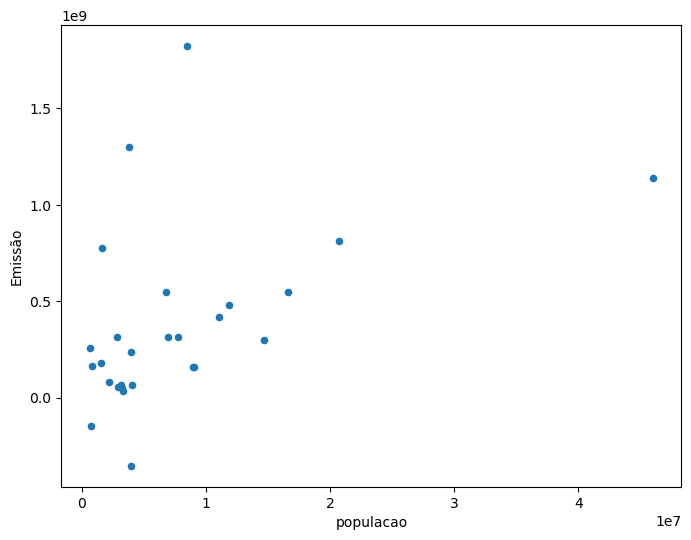

In [93]:
dados_agrupados.plot(x='populacao',y='Emissão',kind = 'scatter',figsize = (8,6))

A biblioteca pandas oferece várias ferramentas para trabalhar com DataFrames, incluindo a capacidade de combinar, juntar e mesclá-los. Essas operações são úteis para combinar dados de diferentes fontes em um único DataFrame. Existem três principais métodos de união de DataFrames em pandas: concat, join e merge.

Concatenação (concat)
A concatenação é um método simples para combinar DataFrames, no qual suas colunas e índices são mantidos e os valores são simplesmente concatenados uns sobre os outros. O método ['concat()'](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat) permite que você concatene DataFrames verticalmente (um acima do outro) ou horizontalmente (lado a lado).

A sintaxe básica para usar o método concat é a seguinte:

pd.concat([dataframe1, dataframe2, ...], axis=0/1)

No qual, axis é o eixo do qual a concatenação vai acontecer. Se axis=0, a concatenação ocorre ao longo do eixo vertical (empilhamento). Se axis=1, a concatenação ocorre ao longo do eixo horizontal (lado a lado).
_______________________________________________________________________________________________________________________________



Join
O método ['join'](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) é usado para unir dois DataFrames com base em suas colunas de índice ou uma coluna de nome especificada. Ele pode ser usado para unir DataFrames com as mesmas colunas ou com colunas diferentes.

Os dois DataFrames precisam ter uma coluna com nome em comum ou possuírem os índices contendo o mesmo tipo de informação, caso a união ocorra pelo índice e não usando alguma coluna. A sintaxe básica para usar o método join é a seguinte:

dataframe1.join(dataframe2, on='nome_coluna', how='left')

No qual on é o nome da coluna em comum entre os dois DataFrames usada como chave de junção. Caso não seja utilizado nenhum valor, a união será feita com base nos índices dos DataFrames. O parâmetro how é o tipo de junção a ser realizada, podendo ser 'left', 'right', 'inner', 'outer'.
_______________________________________________________________________________________________________________________________

Merge
O método ['merge'](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) é o método mais completo para unir dois DataFrames com base em seus índices ou em colunas de ligação. A sintaxe básica para usar o método merge é a seguinte:

dataframe1.merge(dataframe2, on=None, how='inner', left_on='nome_coluna_dataframe1', right_on='nome_coluna_dataframe2')


Nela, o on é o nome da coluna nos dois DataFrames, caso seja o mesmo nome. O parâmetro how é o tipo de junção a ser realizada, podendo ser 'left', 'right', 'inner', 'outer' e 'cross'. Os parâmetros left_on e right_on são respectivamente os nomes das colunas do DataFrame 1 e DataFrame 2, caso tenham nomes diferentes.

Se quisermos saber a informação de cada estado nos pontos do gráfico, podemos utilizar uma outra biblioteca para obter um gráfico mais elaborado.

In [48]:
# gráfico de expressão.
import plotly.express as px

In [121]:
# opacity = 0 deixando o ponto invisivel.
px.scatter(data_frame = dados_agrupados, x ='populacao', y = 'Emissão', text='Estado',opacity = 0 )

Para obtermos a emissão por capita, criaremos uma nova coluna com a divisão dos valores de emissão pela população de cada estado.

O método assign() permite criar uma ou mais colunas com base em operações com colunas existentes e retorna uma cópia do DataFrame original com as novas colunas adicionadas. Para criar colunas com base em uma coluna recém-criada, é necessário utilizar uma função lambda na criação da coluna.


O método insert() permite a criação de apenas uma coluna escolhendo a posição em que será inserida a coluna.

O método apply() permite aplicar uma função a uma coluna e criar uma nova coluna com base no resultado da função.

O método append() insere apenas novas linhas na base de dados e não consegue inserir colunas. Além disso, é um método depreciado desde a versão 1.4.0 do pandas.


Para obtermos a emissão per capita, criaremos uma nova coluna com a divisão dos valores de emissão pela população de cada estado.

In [115]:
dados_agrupados = dados_agrupados.assign(emissao_per_capita = (dados_agrupados['Emissão']/ dados_agrupados['populacao']).abs()).sort_values('emissao_per_capita',ascending=False)



In [116]:
#emissao_per_capita = (dados_agrupados['Emissão']/ dados_agrupados['populacao']).abs()
#emissao_per_capita

In [117]:
dados_agrupados

,Estado,Emissão,UF,populacao,emissao_per_capita
20,RO,7.781357e+08,RO,1616379,481.406685
21,RR,2.553918e+08,RR,634805,402.315342
12,MT,1.299280e+09,MT,3784239,343.339916
13,PA,1.824634e+09,PA,8442962,216.113042
0,AC,1.647780e+08,AC,829780,198.580403
3,AP,-1.464334e+08,AP,774268,189.124985
26,TO,1.803102e+08,TO,1584306,113.810197
11,MS,3.131680e+08,MS,2833742,110.513958
2,AM,-3.536316e+08,AM,3952262,89.475755
9,MA,5.491927e+08,MA,6800605,80.756444


In [119]:
px.bar(data_frame = dados_agrupados, x = 'Estado', y='emissao_per_capita')


In [120]:
px.scatter(data_frame = dados_agrupados, x ='populacao', y = 'Emissão', text='Estado',size ='emissao_per_capita')

In [88]:
# verificando valores unicos
# print(dados_agrupados['emissao_per_capita'].unique())


[ 481.40668486  402.31534206  343.33991627  216.11304186  198.58040308
  113.81019682  110.51395762   80.75644403   59.69906239   45.15053213
   40.72610484   40.35689393   39.06766093   37.74765599   37.53829492
   32.87293206   24.7371684    20.50054249   20.4693187    18.14313049
   17.62449459   17.25931886   15.96288659   14.7544689    10.72266809
  -89.47575534 -189.1249855 ]
